In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb

from math import sqrt

import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
df1 = pd.read_csv('traincleaned.csv')

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.025077,0.042033,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.122230,-0.298088,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.375830,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217,4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
0                   200000 non-null float64
1                   200000 non-null float64
2                   200000 non-null float64
3                   200000 non-null float64
4                   200000 non-null float64
5                   200000 non-null float64
6                   200000 non-null float64
7                   200000 non-null float64
8                   200000 non-null float64
9                   200000 non-null float64
loan_amount         200000 non-null float64
applicant_income    200000 non-null float64
rate_spread         200000 non-null int64
dtypes: float64(12), int64(1)
memory usage: 19.8 MB


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,0.453525,0.531540,0.005410,0.009525,0.846310,0.152500,0.001190,0.730515,0.056365,0.213120,3.992973e-17,2.617209e-16,1.974370
std,0.497837,0.499005,0.073354,0.097130,0.360652,0.359506,0.034476,0.443693,0.230626,0.409513,1.000003e+00,1.000003e+00,1.593451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.930963e-01,-6.965148e-01,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.301305e-01,-3.175233e-01,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.864135e-01,-1.620397e-01,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.555084e-01,7.118587e-02,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.689038e+01,9.687922e+01,8.000000


In [6]:
df1.shape

(200000, 13)

In [7]:
array = df1.values

In [8]:
type(array)

numpy.ndarray

In [9]:
X = array[:,0:12]
y = array[:,12]

In [10]:
X.shape

(200000, 12)

In [11]:
y.shape

(200000,)

### Using Grid Search to find best parameters

In [ ]:
xgbmodel1 = xgb.XGBRegressor(n_estimators=100,n_jobs=4,random_state=0,objective='reg:squarederror')
params_grid = {'max_depth': [2, 4, 6]}
grid_search_xgb1 = GridSearchCV(xgbmodel1,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)
grid_search_xgb1.fit(X,y)
grid_search_xgb1.best_params_

In [ ]:
xgbmodel2 = xgb.XGBRegressor(n_estimators=100,n_jobs=4,max_depth=6,
                             random_state=0,objective='reg:squarederror')
params_grid = {'learning_rate': [0.1, 0.5, 1.0]}
grid_search_xgb2 = GridSearchCV(xgbmodel2,params_grid,scoring='r2',n_jobs=-1,cv=10,verbose=True)
grid_search_xgb2.fit(X,y)
grid_search_xgb2.best_params_

In [ ]:
xgbmodel3 = xgb.XGBRegressor(n_jobs=4,max_depth=6,learning_rate=0.1,
                             random_state=0,objective='reg:squarederror')
params_grid = {'n_estimators' : [100, 200, 300]}
grid_search_xgb3 = GridSearchCV(xgbmodel3,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)
grid_search_xgb3.fit(X,y)
grid_search_xgb3.best_params_

In [ ]:
xgbmodel4 = xgb.XGBRegressor(n_estimators=100,n_jobs=4,max_depth=6,learning_rate=0.1,
                             random_state=0,objective='reg:squarederror')
params_grid = {'subsample' : [0.5, 0.75, 1.0]}
grid_search_xgb4 = GridSearchCV(xgbmodel4,params_grid,scoring='r2',n_jobs=-1,cv=10,verbose=True)
grid_search_xgb4.fit(X,y)
grid_search_xgb4.best_params_

**Best parameters are max_depth = 6, learning rate = 0.1, n_estimator = 100, subsample=1**

### Using Randomised Search for parameters

In [ ]:
xgbmodel1 = xgb.XGBRegressor(n_estimators=100,n_jobs=4,random_state=0,objective='reg:squarederror')

In [ ]:
params_grid = {'max_depth': [3, 6], 'learning_rate': [0.1,0.3],'n_estimators' : [100, 200]}

In [ ]:
grid_search_xgb1 = RandomizedSearchCV(xgbmodel1,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [ ]:
grid_search_xgb1.fit(X,y)

In [ ]:
grid_search_xgb1.best_params_

In [ ]:
xgbmodel2 = xgb.XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,
                             n_jobs=4,random_state=0,objective='reg:squarederror')

In [ ]:
params_grid = {'min_child_weight': [2, 4], 'subsample': [0.5,1.0],'scale_pos_weight' : [1, 16]}

In [ ]:
grid_search_xgb2 = RandomizedSearchCV(xgbmodel2,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [ ]:
grid_search_xgb2.fit(X,y)

In [ ]:
grid_search_xgb2.best_params_

In [ ]:
xgbmodel3 = xgb.XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,
                             subsample=1.0,scale_pos_weight=1,min_child_weight=2,
                             n_jobs=4,random_state=0,objective='reg:squarederror')

In [ ]:
params_grid = {'colsample_bytree': [0.5,1.0], 'colsample_bylevel': [0.5,1.0],'colsample_bynode' : [0.5,1.0]}

In [ ]:
grid_search_xgb3 = RandomizedSearchCV(xgbmodel3,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [ ]:
grid_search_xgb3.fit(X,y)

In [ ]:
grid_search_xgb3.best_params_

In [ ]:
xgbmodel4 = xgb.XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,
                             subsample=1.0,scale_pos_weight=1,min_child_weight=2,
                             colsample_bylevel=0.5,colsample_bynode=1.0,colsample_bytree=1.0,
                             n_jobs=4,random_state=0,objective='reg:squarederror')

In [ ]:
params_grid = {'alpha': [0.0,100.0], 'lambda': [0.0,100.0],'gamma' : [0.0,100.0]}

In [ ]:
grid_search_xgb4 = RandomizedSearchCV(xgbmodel4,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [ ]:
grid_search_xgb4.fit(X,y)

In [ ]:
grid_search_xgb4.best_params_

**Best parameters are max_depth = 6, learning rate = 0.1, n_estimator = 100, 'subsample': 1.0, 'scale_pos_weight': 1, 'min_child_weight': 2, 'colsample_bytree': 1.0, 'colsample_bynode': 1.0, 'colsample_bylevel': 0.5, 'lambda': 0.0, 'gamma': 0.0, 'alpha': 0.0**

### Load in test set

In [12]:
X_test = pd.read_csv('testmodified.csv')

In [13]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.665492,-0.218602
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.185659,0.774446
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.213116,0.273193
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.185004,-0.209144
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.239917,0.140787


In [14]:
X_test.shape

(200000, 12)

In [24]:
X_test = X_test.values

### Perform Training using Best Hyperparameter 

In [25]:
xgbmodel5 = xgb.XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,
                             subsample=1.0,scale_pos_weight=1,min_child_weight=2,
                             colsample_bylevel=0.5,colsample_bynode=1.0,colsample_bytree=1.0,
                             reg_alpha=0.0,reg_lambda=0.0,gamma=0.0,
                             n_jobs=4,random_state=0,objective='reg:squarederror')

In [26]:
xgbmodel5.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1.0, colsample_bytree=1.0, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=2, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1,
             seed=None, silent=None, subsample=1.0, verbosity=1)

In [28]:
y_predict = xgbmodel5.predict(X_test)

In [29]:
y_predict

array([5.1752157, 1.7568749, 1.649625 , ..., 1.213311 , 1.2538602,
       1.1707582], dtype=float32)

In [30]:
y_predict.shape

(200000,)

### Model Evaluation

In [31]:
MSE = mean_squared_error(y,y_predict)
print("Mean Squared Error is", MSE)

Mean Squared Error is 3.8852947184711044


In [32]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

RMSE is 1.971


In [33]:
MAE = mean_absolute_error(y,y_predict)
print("MAE is", MAE)

MAE is 1.3331765125364066


In [34]:
r2 = r2_score(y,y_predict)
print("R2 score is", r2)

R2 score is -0.5302019913201708


In [36]:
explained_variance_score(y,y_predict)

-0.5300593212275662

### Save the results

In [37]:
xgprediction = pd.DataFrame(y_predict)

In [38]:
xgprediction

,0
0,5.175216
1,1.756875
2,1.649625
3,1.620630
4,1.676941
...,...
199995,1.697876
199996,3.744638
199997,1.213311
199998,1.253860


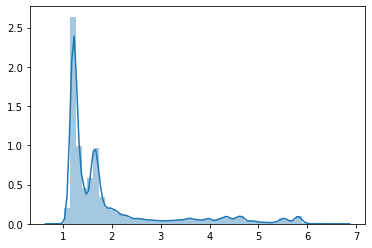

In [39]:
sns.distplot(xgprediction)
plt.show()

In [40]:
xgprediction.to_csv('xgboostresult.csv')

**Result is 0.5459**